In [1]:
#Code for 1 and 2 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the primary and secondary sales files
secondary_sales = pd.read_csv("WC_DS_Ex1_Sec_Sales.csv",parse_dates=[3],index_col=[3]).sort_index()
primary_sales = pd.read_csv("WC_DS_Ex1_Pri_Sales.csv",parse_dates=[3],index_col=[3]).sort_index()
invoice_record = pd.read_csv("WC_DS_EX1_Inv.csv",parse_dates=[3],index_col=[3]).sort_index()

# ANALYSIS ON STORE BASIS ON SECONDARY SALE

In [3]:
def store_feature(df,store_code):
    Store =  df['Store_Code'] == store_code
    Store_secondary_sales = df[Store]
    Store_secondary_sales_week = pd.DataFrame()
    Store_secondary_sales_week_sum = Store_secondary_sales[['Sales_Qty']].resample('W').sum()    
    Store_secondary_sales_week_mean = Store_secondary_sales[['MRP','SP']].resample('W').mean()
    Store_secondary_sales_week['MRP'] = Store_secondary_sales_week_mean['MRP']
    Store_secondary_sales_week['SP'] = Store_secondary_sales_week_mean['SP']
    Store_secondary_sales_week['Promotions'] = 1-Store_secondary_sales_week['SP']/Store_secondary_sales_week['MRP']
    Store_secondary_sales_week['Store_Code'] = store_code
    Store_secondary_sales_week['Sales_Qty'] = Store_secondary_sales_week_sum['Sales_Qty']
    return Store_secondary_sales_week

In [4]:
Store1_secondary_sales_week = store_feature(secondary_sales,'Store1')

In [5]:
Store1_secondary_sales_week.isna().sum()

MRP           4
SP            4
Promotions    4
Store_Code    0
Sales_Qty     0
dtype: int64

Handling missing values

In [6]:
Store1_secondary_sales_week.dropna(how='any',inplace=True)
Store1_secondary_sales_week.isna().sum()

MRP           0
SP            0
Promotions    0
Store_Code    0
Sales_Qty     0
dtype: int64

# Techniques for outlier detection

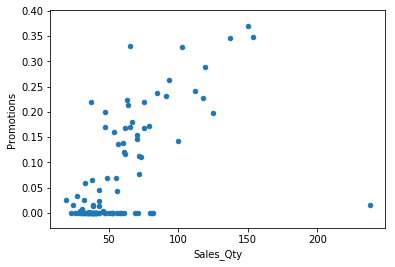

In [7]:
Store1_secondary_sales_week.plot.scatter('Sales_Qty','Promotions')

In [8]:
def remove_outlier(df,column):
    #Remove outlier on the basis of that column
    #Threshold is 3
    Store_secondary_sales_week_nooutlier = pd.DataFrame()
    df['Z-score'] = np.abs(stats.zscore(df[column]))
    Z =  df['Z-score'] < 3
    Store_secondary_sales_week_nooutlier = df[Z]
    print(Z.value_counts())
    print("False count shows the number of outliers")
    Store_secondary_sales_week_nooutlier.drop(columns=['Z-score'],axis=1,inplace=True)
    return Store_secondary_sales_week_nooutlier

In [9]:
Store1_secondary_sales_week_nooutlier = remove_outlier(Store1_secondary_sales_week,'Sales_Qty')

True     100
False      1
Name: Z-score, dtype: int64
False count shows the number of outliers


In [10]:
Store1_secondary_sales_week_nooutlier = remove_outlier(Store1_secondary_sales_week_nooutlier,'Promotions')

True    100
Name: Z-score, dtype: int64
False count shows the number of outliers


In [11]:
Store1_secondary_sales_week_nooutlier.reset_index(inplace=True)
Store1_secondary_sales_week_nooutlier.head()

,Date,MRP,SP,Promotions,Store_Code,Sales_Qty
0,2016-01-03,958.333333,826.674242,0.137383,Store1,60
1,2016-01-10,812.976190,721.057143,0.113065,Store1,72
2,2016-01-17,939.885496,753.539695,0.198264,Store1,125
3,2016-01-24,865.000000,717.332000,0.170714,Store1,65
4,2016-01-31,876.785714,751.913393,0.142421,Store1,100


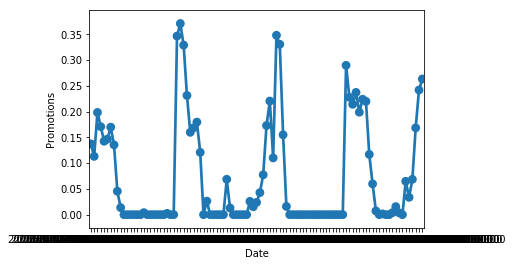

In [35]:
L1 = sns.pointplot(x=Store1_secondary_sales_week.index,y=Store1_secondary_sales_week['Promotions'])

Here we have one outlier in the sales quantity . Possible solutions to deal with outliers remove the obseravations or impute the outliers with the either mean,median or mode. Here we are removing the rows containing outliers.

In [61]:
Store1_secondary_sales_week_nooutlier.shape

(100, 6)

# For Store2

In [23]:
Store2_secondary_sales_week = store_feature(secondary_sales,'Store2')

In [24]:
Store1_secondary_sales_week.isna().sum()

MRP           0
SP            0
Promotions    0
Store_Code    0
Sales_Qty     0
Z-score       0
dtype: int64

In [25]:
Store2_secondary_sales_week_nooutlier = remove_outlier(Store2_secondary_sales_week,'Sales_Qty')

True     104
False      1
Name: Z-score, dtype: int64
False count shows the number of outliers


In [26]:
Store2_secondary_sales_week_nooutlier.head()

,MRP,SP,Promotions,Store_Code,Sales_Qty
Date,,,,,
2016-01-03,863.448276,742.005172,0.140649,Store2,54
2016-01-10,882.831325,768.362651,0.129661,Store2,75
2016-01-17,995.978261,771.275000,0.225611,Store2,84
2016-01-24,949.166667,740.995833,0.219320,Store2,86
2016-01-31,948.698630,794.210959,0.162842,Store2,69


In [21]:
#Store2_secondary_sales_week_nooutlier = remove_outlier(Store2_secondary_sales_week_nooutlier,'Promotions')

False    104
Name: Z-score, dtype: int64
False count shows the number of outliers


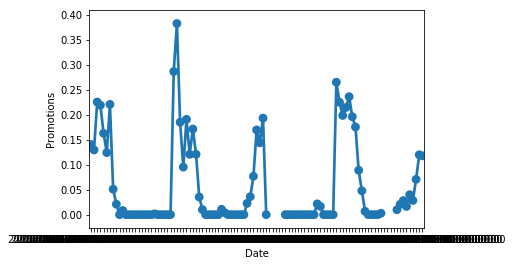

In [31]:
L1 = sns.pointplot(x=Store2_secondary_sales_week.index,y=Store2_secondary_sales_week['Promotions'])
#Line plot does not work in jupyter notebook
#There is lot of variations in promotions
#And we can see the trend for promotions

In [33]:
Store2_secondary_sales_week_nooutlier.reset_index(inplace=True)
Store2_secondary_sales_week_nooutlier.head(5)

,Date,MRP,SP,Promotions,Store_Code,Sales_Qty
0,2016-01-03,863.448276,742.005172,0.140649,Store2,54
1,2016-01-10,882.831325,768.362651,0.129661,Store2,75
2,2016-01-17,995.978261,771.275000,0.225611,Store2,84
3,2016-01-24,949.166667,740.995833,0.219320,Store2,86
4,2016-01-31,948.698630,794.210959,0.162842,Store2,69


# Store3 Analysis

In [36]:
Store3_secondary_sales_week = store_feature(secondary_sales,'Store3')

In [37]:
Store3_secondary_sales_week.isna().sum()

MRP           4
SP            4
Promotions    4
Store_Code    0
Sales_Qty     0
dtype: int64

In [38]:
Store3_secondary_sales_week.dropna(how='any',inplace=True)
Store3_secondary_sales_week.isna().sum()

MRP           0
SP            0
Promotions    0
Store_Code    0
Sales_Qty     0
dtype: int64

In [39]:
Store3_secondary_sales_week_nooutlier = remove_outlier(Store3_secondary_sales_week,'Sales_Qty')

True     99
False     2
Name: Z-score, dtype: int64
False count shows the number of outliers


In [40]:
Store3_secondary_sales_week_nooutlier = remove_outlier(Store3_secondary_sales_week_nooutlier,'Promotions')

True    99
Name: Z-score, dtype: int64
False count shows the number of outliers


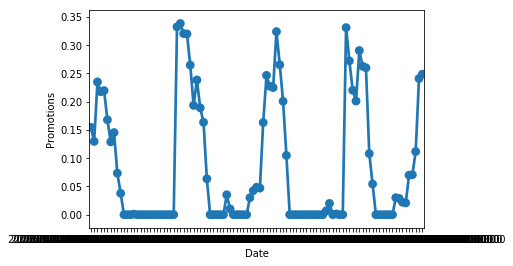

In [41]:
L1 = sns.pointplot(x=Store3_secondary_sales_week.index,y=Store3_secondary_sales_week['Promotions'])

In [42]:
Store3_secondary_sales_week_nooutlier.reset_index(inplace=True)
Store3_secondary_sales_week_nooutlier.head(5)

,Date,MRP,SP,Promotions,Store_Code,Sales_Qty
0,2016-01-03,917.285714,775.398095,0.154682,Store3,97
1,2016-01-10,872.581699,759.466667,0.129633,Store3,139
2,2016-01-17,1045.824742,800.078351,0.234979,Store3,182
3,2016-01-24,1036.212121,810.615152,0.217713,Store3,124
4,2016-01-31,1012.526882,790.181720,0.219594,Store3,174


# ANALYSIS ON PRIMARY SALES ON STORE

In [ ]:
    Store =  df['Store_Code'] == store_code
    Store_secondary_sales = df[Store]
    Store_secondary_sales_week = pd.DataFrame()
    Store_secondary_sales_week_sum = Store_secondary_sales[['Sales_Qty']].resample('W').sum()    
    Store_secondary_sales_week_mean = Store_secondary_sales[['MRP','SP']].resample('W').mean()
    Store_secondary_sales_week['MRP'] = Store_secondary_sales_week_mean['MRP']
    Store_secondary_sales_week['SP'] = Store_secondary_sales_week_mean['SP']
    Store_secondary_sales_week['Promotions'] = 1-Store_secondary_sales_week['SP']/Store_secondary_sales_week['MRP']
    Store_secondary_sales_week['Store_Code'] = store_code
    Store_secondary_sales_week['Sales_Qty'] = Store_secondary_sales_week_sum['Sales_Qty']

In [43]:
primary_sales.head()    

,Store_Code,SKU_Code,Category,Qty
Date,,,,
2015-12-11,Store1,603132,Cat1,2
2015-12-11,Store1,614490,Cat2,1
2015-12-11,Store3,603819,Cat2,2
2015-12-11,Store3,603810,Cat2,1
2015-12-11,Store3,603417,Cat3,1


In [57]:
def primary_feature(df,store_code):
    Store = df['Store_Code'] == store_code
    Store_primary_sales = df[Store]
    Store_primary_sales.drop(columns=['SKU_Code','Category'],axis=1,inplace=True)
    Store_primary_sales_week = Store_primary_sales.resample('W').sum()
    print(Store_primary_sales_week.head())
    return Store_primary_sales_week

In [58]:
Store1_primary_sales_week = primary_feature(primary_sales,'Store1')

            Qty
Date           
2015-12-13   81
2015-12-20  346
2015-12-27    0
2016-01-03  130
2016-01-10    0


In [59]:
Store1_primary_sales_week_nooutlier = remove_outlier(Store1_primary_sales_week,'Qty')

True     105
False      3
Name: Z-score, dtype: int64
False count shows the number of outliers


In [63]:
Store1_primary_sales_week_nooutlier.reset_index(inplace=True)
Store1_primary_sales_week_nooutlier.head()

,Date,Qty
0,2015-12-13,81
1,2015-12-20,346
2,2015-12-27,0
3,2016-01-03,130
4,2016-01-10,0


Combine primary sales and secondary sales data

Here i am mergeing the two primary and secondary sales frame on the basis of Date as reference.
Obervations: 
1.For 2015 in secondary_sales there is no data , so this Qty is already delivered to respective store . And sales begins after that only.

In [173]:
Store1_primary_secondary = pd.merge(Store1_primary_sales_week_nooutlier,Store1_secondary_sales_week_nooutlier,how='left',on=['Date'])
Store1_primary_secondary = Store1_primary_secondary.replace(np.nan,'0',regex=True)
Store1_primary_secondary['Store_Code'] = 'Store1'
Store1_primary_secondary.head()


,Date,Qty,MRP,SP,Promotions,Store_Code,Sales_Qty
0,2015-12-13,81,0,0,0,Store1,0
1,2015-12-20,346,0,0,0,Store1,0
2,2015-12-27,0,0,0,0,Store1,0
3,2016-01-03,130,958.333,826.674,0.137383,Store1,60
4,2016-01-10,0,812.976,721.057,0.113065,Store1,72


In [118]:
Store1_primary_secondary.dtypes

Date          datetime64[ns]
Qty                    int64
MRP                   object
SP                    object
Promotions            object
Store_Code            object
Sales_Qty             object
dtype: object

Note convert all to int types

In [169]:
Store1_primary_secondary['Sales_Qty'] = Store1_primary_secondary['Sales_Qty'].astype(int)
Store1_primary_secondary.dtypes

Date          datetime64[ns]
Qty                    int64
MRP                   object
SP                    object
Promotions            object
Store_Code            object
Sales_Qty              int32
dtype: object

# Closing Inventory calculations for Store1

Estimation for closing inventory :  
We do not have data for secondary sales for December 2015 , for those weeks data is fill with zeros.  


In [ ]:
temp = []
for i in range(len(Store1_primary_secondary)):
    #print(Store1_primary_secondary.loc[:i,'Qty'])
    if i == 0:
        temp.append(Store1_primary_secondary.loc[:i,'Qty'][0])
        #print(t1[0])
    else:
        last = int(temp[i-1])
        a = int(list(Store1_primary_secondary.loc[i:i,'Sales_Qty'])[0])
        b = int(list(Store1_primary_secondary.loc[i:i,'Qty'])[0])
        
        result = last - a + b
        print(result)
        temp.append(result)
        #temp.append(last ) # - list(Store1_primary_secondary.loc[i:i,'Sales_Qty'])[0] ) #+ list(Store1_primary_secondary.loc[i:i,'Qty'])[0])
        #temp.append(temp[i-1] - Store1_primary_secondary.loc[:i,'Sales_Qty'] ) #+ Store1_primary_secondary.loc[:i,'Qty'])

In [195]:
Store1_primary_secondary['closing-inventory'] = temp

In [196]:
Store1_primary_secondary.head()

,Date,Qty,MRP,SP,Promotions,Store_Code,Sales_Qty,closing-inventory
0,2015-12-13,81,0,0,0,Store1,0,81
1,2015-12-20,346,0,0,0,Store1,0,427
2,2015-12-27,0,0,0,0,Store1,0,427
3,2016-01-03,130,958.333,826.674,0.137383,Store1,60,497
4,2016-01-10,0,812.976,721.057,0.113065,Store1,72,425


# Average out of Stock percentage

In [209]:
Store = secondary_sales['Store_Code'] == 'Store1'
Store1_second_sales = secondary_sales[Store]
Store1_second_sales = Store1_second_sales[['Store_Code','SKU_Code']]
Store1_second_sales.reset_index(inplace=True)

column_1 = Store1_second_sales['Date']

temp = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              #"hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              #"dayofweek": column_1.dt.dayofweek,
              #"weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

#All the result for store1 and Category 1 only

Store1_second_sales.reset_index(drop=True, inplace=True)
temp.reset_index(drop=True, inplace=True)
Store1_second_sales = pd.concat([Store1_second_sales,temp],axis=1)
Store1_second_sales.head()

,Date,Store_Code,SKU_Code,year,month,day,dayofyear,week,weekofyear,quarter
0,2016-01-01,Store1,610221,2016,1,1,1,53,53,1
1,2016-01-01,Store1,614466,2016,1,1,1,53,53,1
2,2016-01-01,Store1,603738,2016,1,1,1,53,53,1
3,2016-01-01,Store1,603540,2016,1,1,1,53,53,1
4,2016-01-01,Store1,610371,2016,1,1,1,53,53,1


In [240]:
year_list =[2016,2017]
list_31 = [1,3,5,7,8,10,12]
list_30 = [4,6,9,11]
temp = []
for i in year_list:
    year = Store1_second_sales['year'] == i
    Store1_second_sales_year = Store1_second_sales[year]
    for j in range(1,13):
        month = Store1_second_sales_year['month'] == j
        Store1_second_sales_year_month = Store1_second_sales_year[month]
        month_count = len(Store1_second_sales_year_month['SKU_Code'].value_counts())
        if i == 2016 & j == 2:
            #For leap year ,29 Days
            for k in range(1,30):
                day = Store1_second_sales_year_month['day'] == k
                Store1_second_sales_year_month_day = Store1_second_sales_year_month[day]
                day_count = len(Store1_second_sales_year_month_day['SKU_Code'].unique())
                result = 1 - day_count/month_count
                temp.append(result)
                #Store1_second_sales_year
                #Store1_second_sales_year_month_day.head()
        if j == 2017 & j == 2:
            for k in range(1,29):
                day = Store1_second_sales_year_month['day'] == k
                Store1_second_sales_year_month_day = Store1_second_sales_year_month[day]
                day_count = len(Store1_second_sales_year_month_day['SKU_Code'].unique())
                result = 1 - day_count/month_count
                temp.append(result)
        if j in list_31:
            for k in range(1,32):
                day = Store1_second_sales_year_month['day'] == k
                Store1_second_sales_year_month_day = Store1_second_sales_year_month[day]
                day_count = len(Store1_second_sales_year_month_day['SKU_Code'].unique())
                result = 1 - day_count/month_count
                temp.append(result)
        if j in list_30:
            for k in range(1,31):
                day = Store1_second_sales_year_month['day'] == k
                Store1_second_sales_year_month_day = Store1_second_sales_year_month[day]
                
                day_count = len(Store1_second_sales_year_month_day['SKU_Code'].unique())
                result = 1 - day_count/month_count
                temp.append(result)

In [242]:
len(temp)

674

In [244]:
len(Store1_second_sales['Date'].value_counts())

675

In [245]:
data = pd.date_range('1/1/2016', periods = 731, freq ='D') 

In [251]:
data = pd.DataFrame(data)
data.columns=['Date']
diff = set(Store1_second_sales['Date']) - set(data['Date'])

ValueError: Can only compare identically-labeled Series objects